# Extended Kalman filter

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import ekf

- Define the function we want to estimate: Euler method

In [52]:
def f(state, sigma=10, rho=28, beta=8/3, dt=0.001):
    x, y, z = state
    return np.array([sigma * (y - x) * dt + x, (x * (rho - z) - y) * dt + y, (x * y - beta * z) * dt + z])

In [53]:
# Jacobian
def J_f(state, sigma=10, rho=28, beta=8/3, dt=0.001):
    x, y, z = state
#     return np.array([[1 - rho * dt, rho * dt, 0], [(rho - z) * dt, 1 - dt, -x * dt], [y * dt, x * dt, 1 - beta * dt]])
    return np.array([[1 - sigma * dt, sigma * dt, 0], [(rho - z) * dt, 1 - dt, -x * dt], [y * dt, x * dt, 1 - beta * dt]])


- Define the observation function

In [54]:
def h(state):
    return state

In [55]:
# Jacobian
def J_h(state):
    return np.identity(len(state))

- First we need to get the observations

In [56]:
model_ts = [[-10, -10, 40]] # model time series
for i in range(5000):
    model_ts.append(f(model_ts[-1]))
model_ts = np.array(model_ts)
noise_std = 2
noise = np.random.normal(size=model_ts.shape, scale=noise_std)
obs = (model_ts + noise)[::100] # create samples

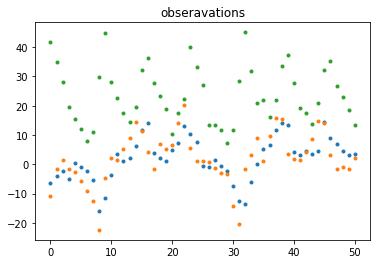

In [57]:
plt.plot(obs, '.')
plt.title('obseravations')
plt.show()

- We need to get the initial background error

In [58]:
P0 = np.identity(3) * 8 
Q0 = np.zeros([3,3])

- And we need to get the initial value

In [59]:
x0 = model_ts[0] + np.random.normal(size=3, scale=2) # init cond 1
# x0 = [1,0,0] # init cond 2

- If we do not perform DA, the prediction error keeps increases

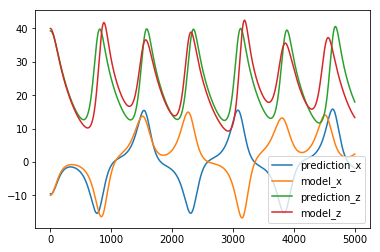

In [60]:
ts = [x0] # predction time series
for i in range(5000):
    ts.append(f(ts[-1]))
ts = np.array(ts)
plt.plot(ts[:,0], label='prediction_x')
plt.plot(model_ts[:,0], label='model_x')
plt.plot(ts[:,2], label='prediction_z')
plt.plot(model_ts[:,2], label='model_z')
plt.legend()
plt.show()

- Using Extended Kalman Filter to perform DA

In [61]:
kf = ekf.ExtendedKalmanFilter(f, J_f, h, J_h, P0, Q0)

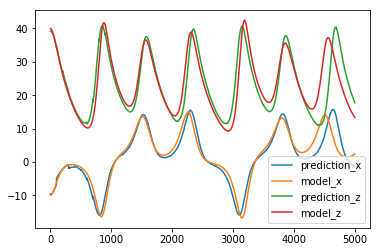

In [62]:
ts = [x0] # predction time series
for i in range(5000):
    if i % 100 == 99:
        ts.append(kf.da(ts[-1], obs[i // 100 + 1], np.identity(3) * noise_std **2 ))
    else:
        ts.append(f(ts[-1]))
ts = np.array(ts)
plt.plot(ts[:,0], label='prediction_x')
plt.plot(model_ts[:,0], label='model_x')
plt.plot(ts[:,2], label='prediction_z')
plt.plot(model_ts[:,2], label='model_z')
plt.legend()
plt.show()